In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [12]:
# 데이터 로드
housing = pd.read_csv("housing.csv")
housing.head(10)
housing.tail(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND
20624,-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,INLAND
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe()
# 피쳐 확인
# 0)경도 1) 위도 2) 구매나이의 중앙값 3) 전체 방 수 4) 전체 침실 수 5) 인구 6) 가정 7) 수입의 중앙값 8) 집값 중앙값 9) 내륙/해안가 유형

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

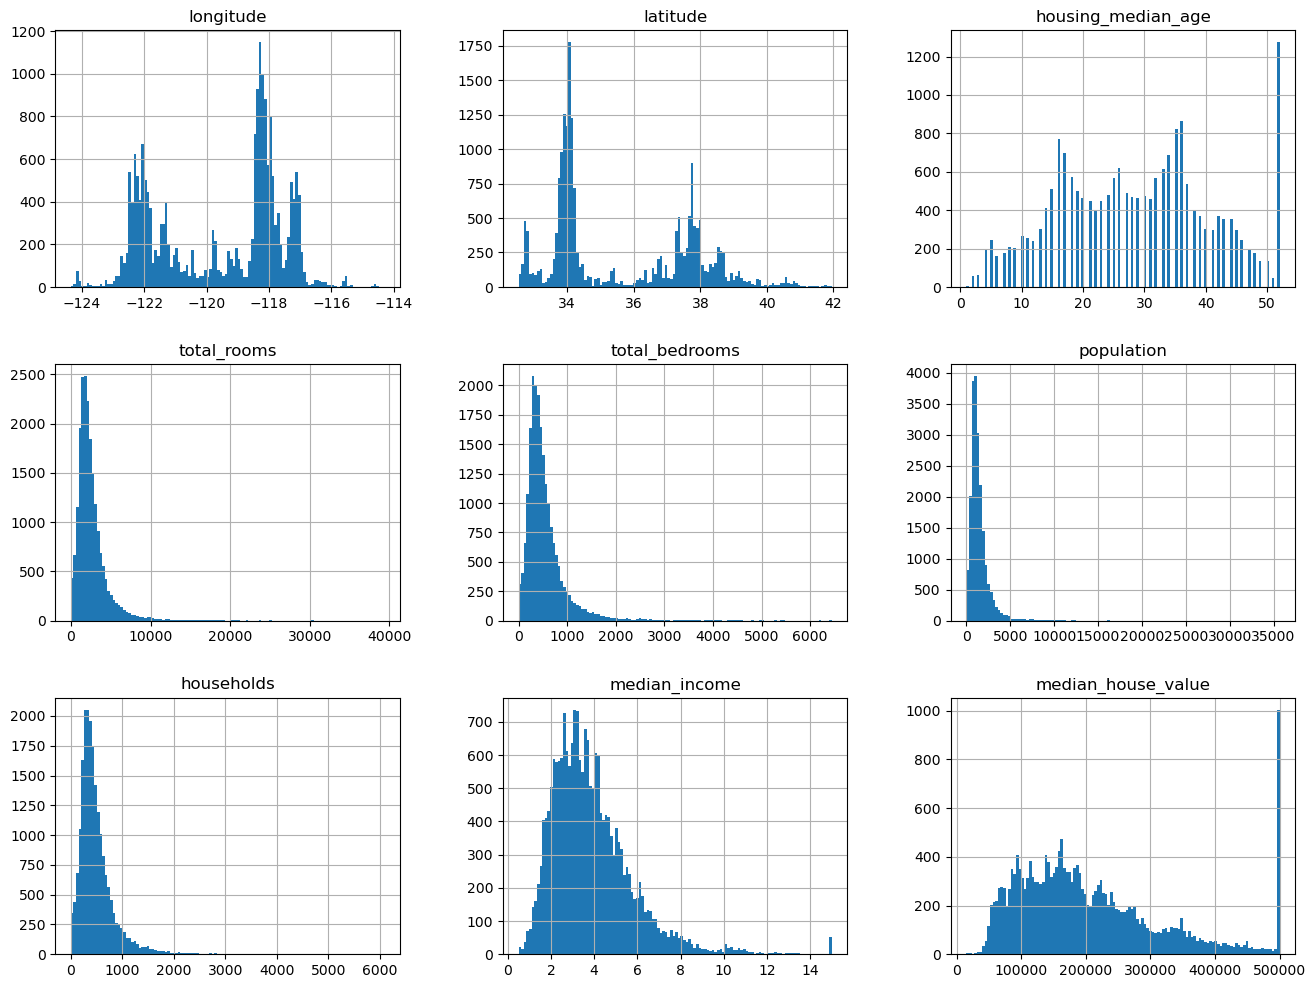

In [21]:
housing.hist(bins=120, figsize = (16,12))
plt.show()
# 테스트셋을 분리하기 전 잠깐 확인

In [25]:
# 테스트셋 분리
from sklearn.model_selection import train_test_split

X, y = train_test_split(housing, test_size = 0.2 , random_state = 9)
# 무작위 샘플링

<AxesSubplot: >

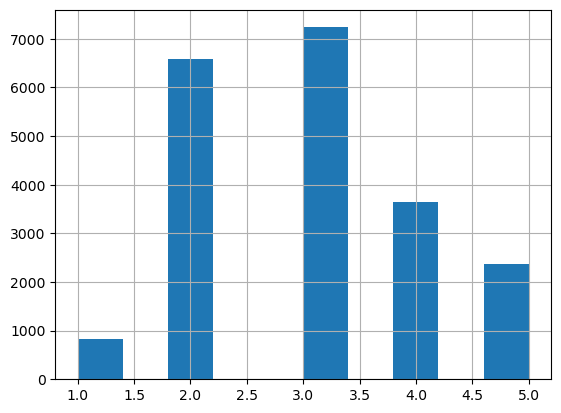

In [27]:
# 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].hist()


In [32]:
# 데이터 분할 수=1
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 9)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6927 to 6961
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16346 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [34]:
# 3단계, 데이터 탐색
housing = strat_train_set.copy()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

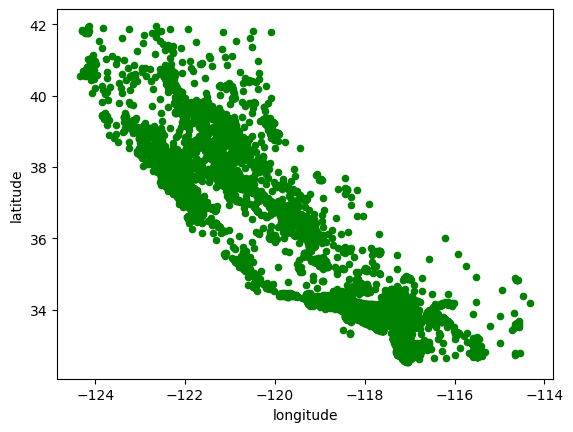

In [41]:
# 단순 산점도
housing.plot(kind="scatter", x="longitude", y="latitude", color = "green")

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

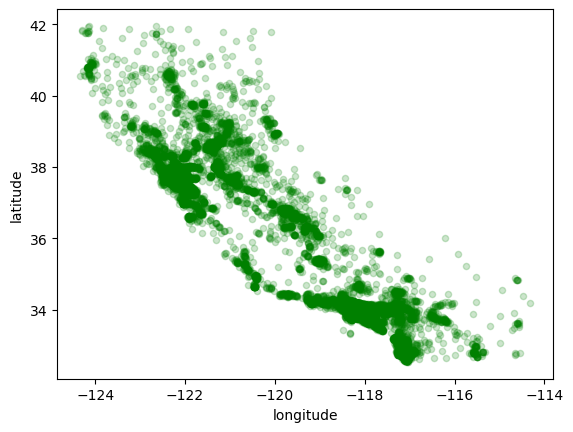

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", color = "green", alpha = 0.2)
# 밀집구역 확인

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

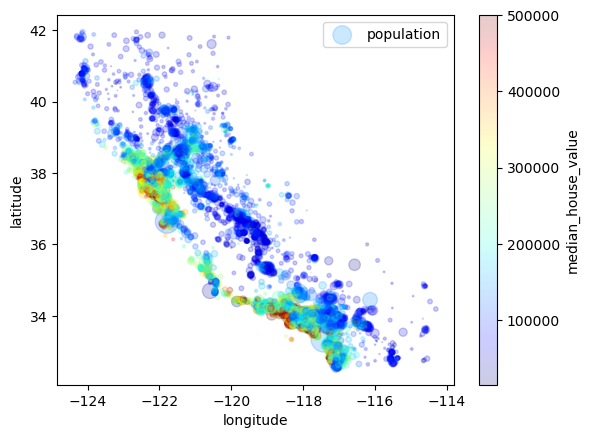

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.2,
            s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,
            sharex=False)